2.Image  Augmentation



In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set',target_size=(64,64),class_mode='categorical',batch_size=10)

Found 1324 images belonging to 9 classes.


In [7]:
data_dir='/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'

In [ ]:
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)

In [10]:
xtest = train_datagen.flow_from_directory('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',target_size=(64,64),class_mode='categorical',batch_size=10)

Found 3426 images belonging to 9 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

4.Add CNN Layers

In [12]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax')) 

5.Compile the model

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.Fit the model

In [14]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [15]:
early_stopping=EarlyStopping(monitor='val_accuracy',
                             patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                            patience=5,
                            factor=0,min_lr=0.00001)
callback= [reduce_lr,early_stopping] 

In [ ]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))

7.Save the model

In [18]:
model.save('Veg.h5')

8.Test the model

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
img = image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG',target_size=(94,94))

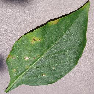

In [21]:
img

In [22]:
x = image.img_to_array(img)
x

array([[[158., 146., 150.],
        [127., 115., 119.],
        [138., 126., 130.],
        ...,
        [198., 181., 187.],
        [189., 170., 174.],
        [203., 184., 180.]],

       [[154., 142., 146.],
        [165., 153., 157.],
        [127., 115., 119.],
        ...,
        [199., 185., 185.],
        [200., 185., 188.],
        [202., 188., 187.]],

       [[165., 153., 157.],
        [175., 163., 167.],
        [160., 148., 152.],
        ...,
        [201., 190., 188.],
        [191., 179., 181.],
        [199., 187., 187.]],

       ...,

       [[186., 176., 175.],
        [200., 187., 197.],
        [198., 184., 199.],
        ...,
        [197., 182., 185.],
        [196., 181., 184.],
        [193., 178., 181.]],

       [[184., 175., 176.],
        [196., 183., 190.],
        [199., 186., 195.],
        ...,
        [189., 174., 177.],
        [186., 171., 174.],
        [186., 171., 174.]],

       [[185., 179., 181.],
        [190., 179., 177.],
        [204., 1

In [23]:
x = np.expand_dims(x,axis=0)
x

array([[[[158., 146., 150.],
         [127., 115., 119.],
         [138., 126., 130.],
         ...,
         [198., 181., 187.],
         [189., 170., 174.],
         [203., 184., 180.]],

        [[154., 142., 146.],
         [165., 153., 157.],
         [127., 115., 119.],
         ...,
         [199., 185., 185.],
         [200., 185., 188.],
         [202., 188., 187.]],

        [[165., 153., 157.],
         [175., 163., 167.],
         [160., 148., 152.],
         ...,
         [201., 190., 188.],
         [191., 179., 181.],
         [199., 187., 187.]],

        ...,

        [[186., 176., 175.],
         [200., 187., 197.],
         [198., 184., 199.],
         ...,
         [197., 182., 185.],
         [196., 181., 184.],
         [193., 178., 181.]],

        [[184., 175., 176.],
         [196., 183., 190.],
         [199., 186., 195.],
         ...,
         [189., 174., 177.],
         [186., 171., 174.],
         [186., 171., 174.]],

        [[185., 179., 181.],
       

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [25]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [26]:

img = image.load_img('/content/drive/MyDrive/IBM/IMAGE/F3.jpeg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))


1/1 [==============================] - 0s 124ms/step
